In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
import pandas as pd

train_df = pd.read_csv("twitter_training.csv", header=None)
val_df   = pd.read_csv("twitter_validation.csv", header=None)

In [14]:
columns = ['id', 'topic', 'sentiment', 'text']

train_df.columns = columns
val_df.columns = columns

In [15]:
train_df.head()
val_df.head()

,id,topic,sentiment,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [16]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    return text

In [17]:
train_df['clean_text'] = train_df['text'].apply(clean_text)
val_df['clean_text'] = val_df['text'].apply(clean_text)

In [18]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

train_df['predicted_sentiment'] = train_df['clean_text'].apply(get_sentiment)
val_df['predicted_sentiment'] = val_df['clean_text'].apply(get_sentiment)

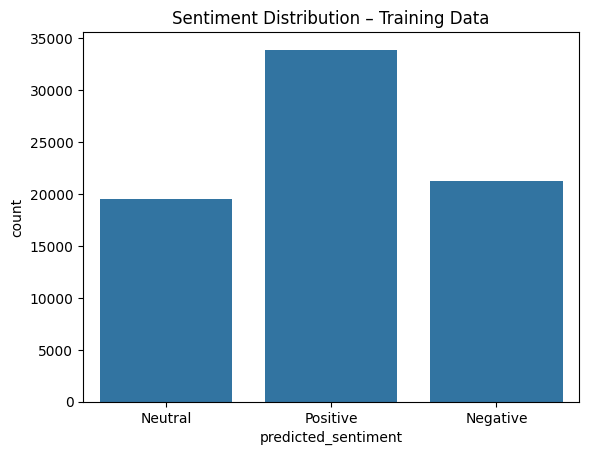

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='predicted_sentiment', data=train_df)
plt.title("Sentiment Distribution – Training Data")
plt.show()

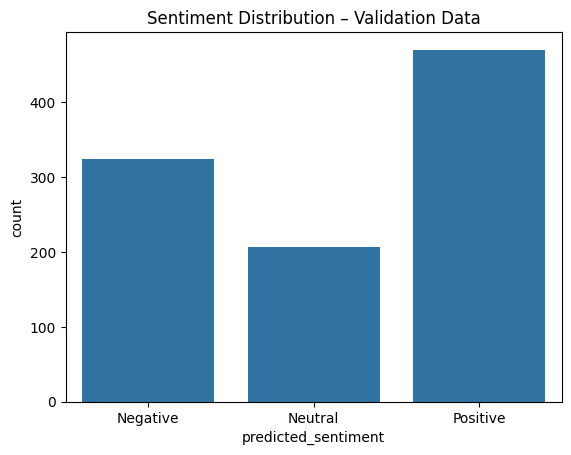

In [21]:
sns.countplot(x='predicted_sentiment', data=val_df)
plt.title("Sentiment Distribution – Validation Data")
plt.show()